地址：  
dtanalyze/论文复刻汇总/Trade_arrival_dynamics_and_quote_imbalance_in_a_limit_order_book/文章总结and复现代码.ipynb   
dtanalyse2/paper_std/Trade arrival dynamics and quote imbalance in a limit order book/文章总结and复现代码.ipynb

# Trade arrival dynamics and quote imbalance in a limit order book

Author: Alexander Lipton, Umberto Pesavento and Michael G Sotiropoulos

Institute: Bank of America Merrill Lynch

Time: 2013.12.2

Journal: 未发表，挂在arxiv上面，目前引用量：44

## 总结：
作者观察到当前时刻的book imbalance与下一笔交易的时间间隔、价差有强相关性。于是作者构建了一个随机模型来预测下一交易与当前时刻的价差，时间间隔以及价格变动方向的概率。
![1](img/1.png)  
Book imbalance 定义： $I=\frac{q^b-q^a}{q^b+q^a}$, 其中$q^a$，$q^b$分别为 best ask 和best bid的amount  

数据源: equity VOD.L for all trading days in the first quarter of 2012（沃达丰，一家通讯公司的股票数据）  

数据格式：  
$t_0,q_0^b,q_0^a,p_0^b,p_0^a$   五元组为ticker数据：每个时间点的bid, ask 的price，amount   
$\tilde{t}_1,\tilde{q}_1,\tilde{p}_1,\tilde{s}_0 $  四元组为trade数据：time，price，amount和买卖方向  

作图步骤：
1. 对于给定时刻，计算I值
2. 看下一个trade 是 sell trade 还是 buy trade，以sell 和buy分组作图
3. 计算下一个trade time与当前时刻bid-ask中间价格的价差p，这样可以得到一些(I,p)对
4. 将I保留一位小数，对于每个I，计算p的均值，分别画出buy trade和sell trade的 I-p散点图。
5. 对于trade time和current time的时间间隔也可以以相同方式作图

![2](img/2.png)  

结论：
1. Book imbalance 和 价差 呈线性关系：Book imbalance越大，下一交易时刻价格可能上涨，即如果best bid amount大于best ask amount，价格倾向于上涨，且amount差值越大，价格上涨越多。
2. Book imbalance 和 时间差 呈抛物线关系：当best bid amount与best ask amount较为接近时，交易时间长，amount 差值越大，交易时间越短。
3. Buy trade 比sell trade有一个向上偏移：可以解释为当达成buy trade时，价格自然上涨，而达成sell trade时，价格自然下降。（图中sell和buy线画反了）

## 模型部分：
构建模型模拟bid and ask queues，将bid ask amount视为随机游走，达到边界时视为价格变化或者达成交易，进而预测的价格正向移动，反向移动以及交易的概率。

### 二元模型：  
只考虑bid，ask的amount，没有考虑时间。amount的变化满足如下关系
![3](img/3.png) 
$w^a$,$w^b$是布朗运动。因为amount一定是正的，当amount变为负数时，要重置 amount，amount的初值从给定分布中取出。将$q^b$,$q^a$视为x,y轴，（bid amount, ask amount）可以看做一个二维的随机游走，到达或者穿过坐标轴，视为价格变化。我们关注下一次价格变化为价格上涨的概率$P（x,y）$。
$P$满足如下方程
![4](img/4.png) 
\rho为bid amount和ask amount相关系数，通常是负数，可以通过历史数据求出。边界条件为
![5](img/5.png) 
边界条件的解释：当ask amount达到0时，价格上涨，而当bid amount达到0时，价格下降。经过一系列参数变换，可以得到方程的显式解为
![6](img/6.png) 

### 三元模型：
在二元模型的基础上加入了$\phi$，表示下次交易的时间，对于买方来说，就是执行买单，对于买方来说时执行卖单。不过这个量是不可观测的
![7](img/7.png) 
与$q^a$,$q^b$相同，发生交易时要重置$\phi$为$\phi_0$。价格发生变化之前发生交易的概率P满足
![8](img/8.png) 
边界条件为
![9](img/9.png) 
边界条件的解释：z=0时，即发生交易，此时概率为1。如果x=0或者y=0但是z不等于0，说明价格发生变化而并没有发生交易，概率$P=0$。
此时解的形式较为复杂，经过两次换元参数变为$\phi$, $\zeta$， $c_n$和$k_n$可以用积分求出。
![10](img/10.png) 
用上述边界条件可以得到价格发生变化之前发生交易的概率，改变边界条件可以得到发生交易之前价格上涨或者下降的概率。

### 校准：
模型里面有几个系数需要通过历史数据得到，包括：xyz之间的相关系数: $\rho_{xy}$, $\rho_{yz}$, $\rho_{xz}$，以及平均交易时间$\phi_0$。对于VOL.D来说，参数为$\rho_{xz}$ = −$\rho_{yz}$ = 0.8, $\rho_{xy}$ = −0.1, $\phi_0$= 3.5 sec$^{1/2}$。

### 论文的预测结果
(模型只建立了概率和book imbalance之间的关系，相当于定性分析，但是并没有说明具体的价格变化怎么建模？我猜测是将概率P变为价差以及时间差，并用同样的方法解PDE，但是这样边界条件不好设置，不像概率的边界条件就是1。）
对于价格变化、时间的预测结果，实线为预测数据，点为真实数据
![11](img/11.png) 
![12](img/12.png) 

### 复现结果
采用2023-2-1（一天），exchange = 'binance' ， symbol = 'btc_usdt_uswap'的数据进行复现      
可以更改代码中的时间，交易所等做不同的图  

作图步骤：
1. 对于每一个ticker，用一档bid,ask的amount计算I值
2. 看下一个trade 是 sell trade 还是 buy trade，以sell和buy分组作图
3. 计算价差p：当前ticker时刻之后最近的trade的成交价减去当前时刻一档bid-ask平均价格，以及时间差t这样可以得到一些(I,p,t)对
4. 将I保留一位小数，对于每个I，计算p,t的均值，分别画出buy trade和sell trade的 I-p散点图,I-t散点图。
5. 横轴为I值，左图纵轴为价差p，单位是dollar，不是tick，右图纵轴为时间差t，单位是毫秒ms。概率图的纵轴为不同情况的概率（价格上涨，价格下降或者交易）

![13](img/13.png) 
![14](img/14.png) 

结果分析：
1. 价差p与Book imbalance 并不呈现明显的线性关系，只有在Book imbalance=1或者-1时比较显著。
2. 时间差的趋势与文章结果大致相同，但是纵坐标差距较大（文章中为7-10秒，实验结果为1-3秒），可能文章中的数据没那么高频。
3. 概率的结果与原文差距较大，trade的概率很小，降采样后也是一样，并且概率没有随着book balance有明显变化。

Note: 
1. 不能用中位数代替均值，因为不同I值的中位数都一样，均值才能看出区别
2. 发现trade数据存在异常值，很短的间隔内价差很大
![15](img/15.png) 

### 订单薄买一卖一量的大小与价格走势的关系

文章中的$I$值的定义反映了amount比值差距，现在我们关注一下amount具体数值大小对接下来几次交易价格走势的影响  

取时间为2023-2-1，exchange = 'binance' ， symbol = 'btc_usdt'，不降采样

首先给出bid amount， ask amount的统计量特征：  


| ask 分位数  | ask amount | bid 分位数 | bid amount| 
| :-----:| :----: | :----: | :----: |
| 0      | 0.00001   | 0      | 0.00001    |
| 0.0001 | 0.00001   | 0.0001 | 0.00001    |
| 0.01   | 0.00001   | 0.01   | 0.00001    |
| 0.5    | 0.01594   | 0.5    | 0.01935    |
| 0.99   | 0.57552   | 0.99   | 0.58176    |
| 0.9999 | 36.99784  | 0.9999 | 22.917673  |
| 1      | 154.39953 | 1      | 142.35656  |

筛选出bid amount大于99%分位数，同时ask amount小于1%分位数的ticker，以及bid amount小于1%分位数，同时ask amount大于99%分位数的ticker，分别视作两种极端不平衡的数据，并计算这些时刻接下来十次交易的均价与当前时刻的价差（单位为dollar），画出图如下： 



![16](img/16.png) 


去重后共有820个符合的ticker,bid极大有436条数据，ask极大有384条数据。结果显示当盘口amount极端不平衡时，接下来的交易确实有明显的趋势特征。  

具体来说，如果盘口bid amount大于当天99%分位数，且此时ask amount大于当天1%分位数，那么下一次交易的平均价格会上涨10个tick（一个tick为0.01dollar），下五次交易的平均价格会上涨50个tick，5次交易之后，价格趋于平衡。对于bid amount极小，ask amount极大时，也有类似的结论。

In [1]:
import os, sys, datetime, logging
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.express as px
import datetime
import calendar
from datetime import timedelta
import joblib
from tqdm import tqdm
from decimal import Decimal, getcontext

sys.path.append(os.getcwd().split('paper_std')[0])
if '../' not in sys.path:
    sys.path.append('../')
    
from util.load_s3_data import *
from convert_depth_format import convert_depth_format2
from TI_function import *

In [2]:
# 取一天的数据，不降采样，所有代码要跑20-30分钟
begin_time = datetime.datetime(2023, 2, 1, 0,tzinfo=TZ_8)
end_time = datetime.datetime(2023, 2, 1, 23,tzinfo=TZ_8)
exchange = 'binance'#'okex', 'binance','coinbase', 'FTX'
symbol = 'btc_usdt'
plot_interval_us = None #降采样

#取数据
ticker_data = LoadS3Data.get_cex_ticker(begin_time, end_time, symbol, exchange, 
                                        plot_interval_us = plot_interval_us)
trade_data = LoadS3Data.get_cex_trade(begin_time, end_time, exchange, symbol, is_merge = True)

In [3]:
#处理ticker数据和trade数据，将json格式变为dataframe
processed_ticker_data = Process_ip_data.process_ticker_data(ticker_data)
processed_trade_data = Process_ip_data.process_trade_data(trade_data)


In [5]:
#计算I值及其对应的时间差，价差，概率等值
I_p_data = []
next_trade_time = 0
next_change_time = 0
trade_start_line = 0
ticker_start_line = 0
for i in tqdm(range(len(processed_ticker_data))):
    curr_ticker = processed_ticker_data.loc[i]
    
    #如果ticker时间超过最后一次trade时间，则退出循环
    if curr_ticker['time'] > processed_trade_data.iloc[-1,0]:
        break
    #寻找对应的trade数据，因为ticker数据更高频，只有当ticker时间超过交易时间才会更新trade的信息
    if curr_ticker['time'] > next_trade_time:
        trade_start_line, next_trade = Process_ip_data.find_trade(curr_ticker['time'], trade_start_line, processed_trade_data)
        next_trade_time = next_trade["time"]
    if curr_ticker['time'] > next_change_time:
        ticker_start_line, next_change_time, ip_change = Process_ip_data.find_change(next_trade_time, curr_ticker['bp'], ticker_start_line, processed_ticker_data)
        
    #价差的单位是真实价格，不是tick，时间差单位是ms
    ip_time = curr_ticker['time']
    ip_i = (curr_ticker['ba']-curr_ticker['aa'])/(curr_ticker['ba']+curr_ticker['aa'])
    ip_price_diff = next_trade["ave_price"] - (curr_ticker['bp']+curr_ticker['ap'])/2
    ip_time_diff = next_trade_time - curr_ticker['time']
    ip_direc = next_trade['direction']
    I_p_data.append([ip_time,ip_i,ip_price_diff,ip_time_diff,ip_direc,ip_change])
    
I_p_data = pd.DataFrame(I_p_data, columns=['time', 'I', 'price_diff', 'time_diff', 'direc', 'change_flag'])
I_p_data['I'] = I_p_data['I'].round(1)  # I值保留一位小数


100%|█████████▉| 7227530/7227533 [19:38<00:00, 6133.38it/s]


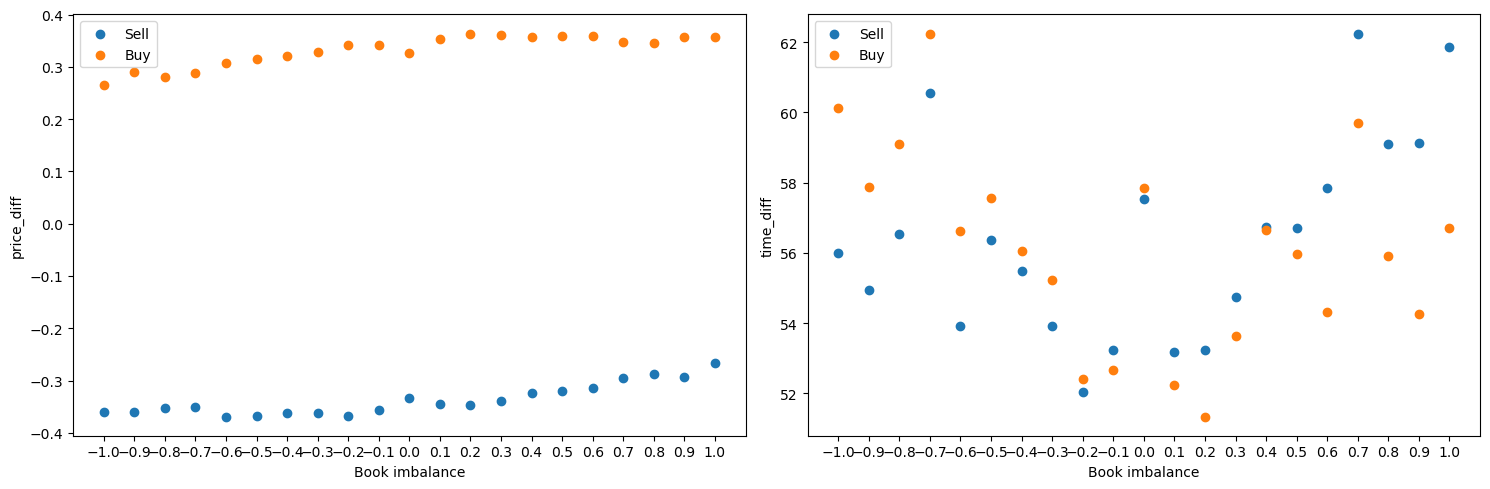

In [6]:
#价差-时间差作图：以buy trade和sell trade分组，不能用中位数，否则没有变化
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
mean_price = I_p_data.groupby(['I','direc'])['price_diff'].mean().reset_index()
grouped = mean_price.groupby('direc')
ip_labels = {
    1: 'Buy',
    0: 'Sell'
}
for name, group in grouped:
    plt.scatter(group['I'], group['price_diff'], label=ip_labels[name])
plt.xticks(np.arange(-1, 1.1, 0.1))
plt.xlabel('Book imbalance')  
plt.ylabel('price_diff')  
plt.legend()
plt.subplot(1, 2, 2)
mean_time = I_p_data.groupby(['I','direc'])['time_diff'].mean().reset_index()
grouped = mean_time.groupby('direc')
ip_labels = {
    1: 'Buy',
    0: 'Sell'
}
for name, group in grouped:
    plt.scatter(group['I'], group['time_diff'], label=ip_labels[name])

plt.xticks(np.arange(-1, 1.1, 0.1))
plt.xlabel('Book imbalance')  
plt.ylabel('time_diff')  
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
#价差-时间差作图：不分组
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 2, 1)
# mean_price = I_p_data.groupby('I')['price_diff'].mean().reset_index()
# plt.xticks(np.arange(-1, 1.1, 0.1))
# plt.scatter(mean_price['I'], mean_price['price_diff'])
# plt.xlabel('Book imbalance')  
# plt.ylabel('price_diff')  

# plt.subplot(1, 2, 2)
# mean_time = I_p_data.groupby('I')['time_diff'].mean().reset_index()
# plt.scatter(mean_time['I'], mean_time['time_diff'])
# plt.xticks(np.arange(-1, 1.1, 0.1))
# plt.xlabel('Book imbalance')  
# plt.ylabel('time_diff')  

# plt.tight_layout()
# plt.show()

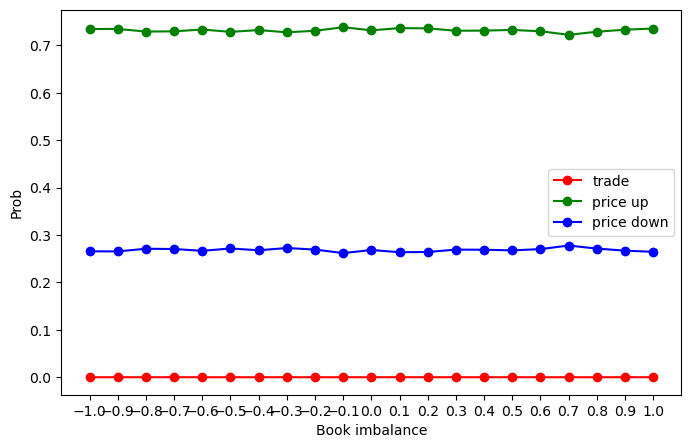

In [7]:
#概率图
plt.figure(figsize=(8, 5))
prob_data = I_p_data.groupby('I')['change_flag'].value_counts(normalize=True).unstack(fill_value=0)
prob_data.reset_index(inplace=True)
plt.plot(prob_data['I'], prob_data[0], '-o', color='red', label='trade')
plt.plot(prob_data['I'], prob_data[1], '-o', color='green', label='price up')
plt.plot(prob_data['I'], prob_data[2], '-o', color='blue', label='price down')
plt.xticks(np.arange(-1, 1.1, 0.1))
plt.legend(loc='right')
plt.xlabel('Book imbalance')
plt.ylabel('Prob')

plt.show()

In [8]:
#检查买一卖一量的大小与价格走势的关系
amount_imbalance_data = []
next_trade_time = 0
next_change_time = 0
trade_start_line = 0
ticker_start_line = 0
next_trade_num = 10 # 画出下面几次的交易的图
bid_max_amount = processed_ticker_data['ba'].quantile(0.99) # 最大最小阈值，要根据不同数据调整，目前是用1%和99%分位数
bid_min_amount = processed_ticker_data['ba'].quantile(0.01)
ask_max_amount = processed_ticker_data['aa'].quantile(0.99)
ask_min_amount = processed_ticker_data['aa'].quantile(0.01)
for i in tqdm(range(len(processed_ticker_data))):
    curr_ticker = processed_ticker_data.loc[i]
    #如果ticker时间超过最后几次trade时间，则退出循环，最终要画出几次trade的平均走势
    if curr_ticker['time'] > processed_trade_data.iloc[-next_trade_num-1,0]:
        break
    
    #只保留那些特别不平衡的数据, ba,aa的具体数值要根据不同数据集进行调整
    if curr_ticker['ba'] >= bid_max_amount and curr_ticker['aa'] <= ask_min_amount:   
        flag = 1
    elif curr_ticker['aa'] >= ask_max_amount and curr_ticker['ba'] <= bid_min_amount:
        flag = 2
    else:
        continue
    #查找下一次交易时间
    if curr_ticker['time'] > next_trade_time:
        trade_start_line, next_trade = Process_ip_data.find_trade(curr_ticker['time'], trade_start_line, processed_trade_data)
        next_trade_time = next_trade["time"]
       
    ip_price_diff = processed_trade_data.loc[trade_start_line:(trade_start_line + next_trade_num - 1),'ave_price']- (curr_ticker['bp']+curr_ticker['ap'])/2
    amount_imbalance_data.append([flag]+ip_price_diff.values.tolist())
    
amount_imbalance_data = pd.DataFrame(amount_imbalance_data, columns=['flag']+[str(i) for i in range(next_trade_num)])
amount_imbalance_data = amount_imbalance_data.drop_duplicates()


100%|█████████▉| 7227519/7227533 [08:49<00:00, 13644.88it/s]


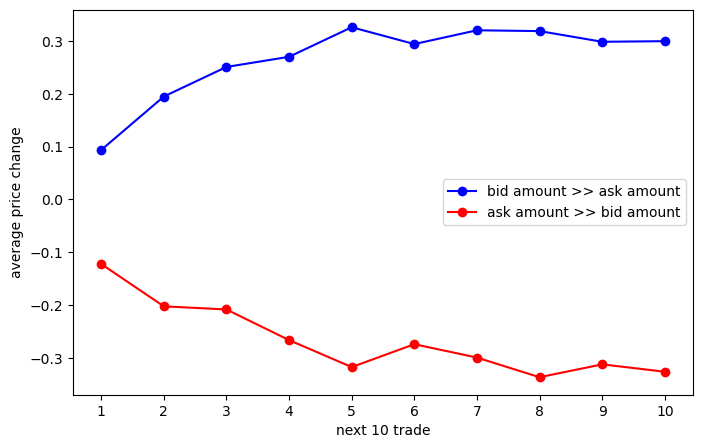

In [9]:
#价格变化图
plt.figure(figsize=(8, 5))
ave_price_change = amount_imbalance_data.groupby('flag').mean()
time_points = [f'{i}' for i in range(1, next_trade_num+1)]

labels = {
    1: 'bid amount >> ask amount',
    2: 'ask amount >> bid amount'
}
colors = {1: 'blue', 2: 'red'} 
for flag in ave_price_change.index:
    plt.plot(time_points, ave_price_change.loc[flag], '-o',label=labels[flag], color=colors[flag])

plt.xlabel(f'next {next_trade_num} trade')
plt.ylabel('average price change')
plt.legend(loc='right')

plt.show()


In [ ]:
len(amount_imbalance_data[amount_imbalance_data['flag']==1])

In [ ]:
processed_ticker_data['aa'].quantile([0,0.0001,0.01,0.5,0.99,0.9999,1])